In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the updated dataset
data = pd.read_csv(r"C:\Users\YSPRE\OneDrive\Desktop\sentimentdataset.csv")

# Preprocessing
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

# Split the data into features and target
X = data[['Retweets', 'Likes']]
y = data['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

def evaluate_classification_performance(y_true, y_pred):
    confusion_mat = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', pos_label='Y')
    recall = recall_score(y_true, y_pred, average='weighted', pos_label='Y')
    f1 = f1_score(y_true, y_pred, average='weighted', pos_label='Y')

    return confusion_mat, accuracy, precision, recall, f1

# Function to preprocess data
def preprocess_data(df):
    # Assume Loan_Status is the target variable
    X = df.drop(columns=['Sentiment'])
    y = df['Sentiment']

    # Encode categorical variables
    label_encoder = LabelEncoder()
    categorical_columns = X.select_dtypes(include=['object']).columns

    for column in categorical_columns:
        X[column] = label_encoder.fit_transform(X[column])

    # Impute missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    return X_imputed, y

# Function to evaluate kNN classifier performance
def evaluate_knn_classifier(X_train, X_test, y_train, y_test, k=3):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_train_pred = knn_classifier.predict(X_train)
    confusion_mat_train, accuracy_train, precision_train, recall_train, f1_train = evaluate_classification_performance(y_train, y_train_pred)

    y_test_pred = knn_classifier.predict(X_test)
    confusion_mat_test, accuracy_test, precision_test, recall_test, f1_test = evaluate_classification_performance(y_test, y_test_pred)

    return confusion_mat_train, accuracy_train, precision_train, recall_train, f1_train, confusion_mat_test, accuracy_test, precision_test, recall_test, f1_test, knn_classifier

# Function to perform hyperparameter tuning using RandomizedSearchCV
def hyperparameter_tuning(X_train, y_train):
    param_dist = {'n_neighbors': range(1, 21)}
    knn_classifier = KNeighborsClassifier()
    random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
    random_search.fit(X_train, y_train)

    return random_search.best_params_

# Load the dataset
file_path = 'C:\\Users\\YSPRE\\OneDrive\\Desktop\\sentimentdataset.csv'
df = pd.read_csv(file_path)

# Preprocess the data
X, y = preprocess_data(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# A1
confusion_mat_train, accuracy_train, precision_train, recall_train, f1_train, confusion_mat_test, accuracy_test, precision_test, recall_test, f1_test, knn_classifier = evaluate_knn_classifier(X_train, X_test, y_train, y_test)

# Print or use the results as needed
print("A1 - Confusion Matrix (Train):", confusion_mat_train)
print("A1 - Accuracy (Train):", accuracy_train)
print("A1 - Precision (Train):", precision_train)
print("A1 - Recall (Train):", recall_train)
print("A1 - F1 Score (Train):", f1_train)

print("A1 - Confusion Matrix (Test):", confusion_mat_test)
print("A1 - Accuracy (Test):", accuracy_test)
print("A1 - Precision (Test):", precision_test)
print("A1 - Recall (Test):", recall_test)
print("A1 - F1 Score (Test):", f1_test)

# A2 - continued
# Assuming 'y_test' is the true values for the test set
# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are defined earlier in the code

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate performance
confusion_mat_test, accuracy_test, precision_test, recall_test, f1_test = evaluate_classification_performance(y_test, y_pred)
print("A2 - Confusion Matrix (Test):", confusion_mat_test)
print("A2 - Accuracy (Test):", accuracy_test)
print("A2 - Precision (Test):", precision_test)
print("A2 - Recall (Test):", recall_test)
print("A2 - F1 Score (Test):", f1_test)

# Load your dataset
# Assuming your dataset is stored in a variable named 'df'
# df = pd.read_csv("your_dataset.csv")
df = pd.read_csv(r"C:\Users\YSPRE\OneDrive\Desktop\sentimentdataset.csv")
# Selecting relevant features
selected_features = ['Likes', 'Retweets']
X = df[selected_features]

# Target variable
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate the F1 score
f1 = f1_score(y_test, predictions, average='weighted')
print(f"F1 Score: {f1:.2f}")

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate performance metrics
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Confusion Matrix:")
print(confusion_matrix)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

A1 - Confusion Matrix (Train): [[1 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
A1 - Accuracy (Train): 0.484375
A1 - Precision (Train): 0.4255186415954428
A1 - Recall (Train): 0.484375
A1 - F1 Score (Train): 0.42788110709755933
A1 - Confusion Matrix (Test): [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
A1 - Accuracy (Test): 0.15454545454545454
A1 - Precision (Test): 0.17108225108225109
A1 - Recall (Test): 0.15454545454545454
A1 - F1 Score (Test): 0.1460826754944402
A2 - Confusion Matrix (Test): [[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
A2 - Accuracy (Test): 0.15454545454545454
A2 - Precision (Test): 0.17108225108225109
A2 - Recall (Test): 0.15454545454545454
A2 - F1 Score (Test): 0.1460826754944402
Accuracy: 2.72%
F1 Score: 0.02
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 

c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 'Y') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 'Y') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Pyt

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_stock_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name)

def generate_random_predictions(actual_prices):
    # Generate random predictions for demonstration purposes
    np.random.seed(42)  # for reproducibility
    return actual_prices * (1 + 0.02 * np.random.randn(len(actual_prices)))

def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_error(actual, predicted) / np.mean(np.abs(actual)) * 100
    r2 = r2_score(actual, predicted)
    return mse, rmse, mape, r2

if __name__ == "__main__":
    # Load stock data from Excel file
    file_path = 'C:\\Users\\YSPRE\\OneDrive\\Desktop\\Lab Session1 Data.xlsx'
    df_stock = load_stock_data(file_path, sheet_name='IRCTC Stock Price')

    # Assuming 'Price' column is the actual stock prices
    actual_prices = df_stock['Price']

    # Generate random predictions for demonstration purposes
    predicted_prices = generate_random_predictions(actual_prices)

    # Calculate metrics
    mse, rmse, mape, r2 = calculate_metrics(actual_prices, predicted_prices)

    # Display results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R2 Score: {r2}")

    # Analyze the results based on the obtained metrics
    # You can add your analysis based on the calculated metrics.
    # Lower MSE and RMSE values indicate better model performance.
    # Lower MAPE values indicate better accuracy.
    # Closer R2 score to 1 indicates a better fit.


Mean Squared Error (MSE): 921.7961868770038
Root Mean Squared Error (RMSE): 30.36109660201693
Mean Absolute Percentage Error (MAPE): 1.5226298052625966%
R2 Score: 0.9842418553819514


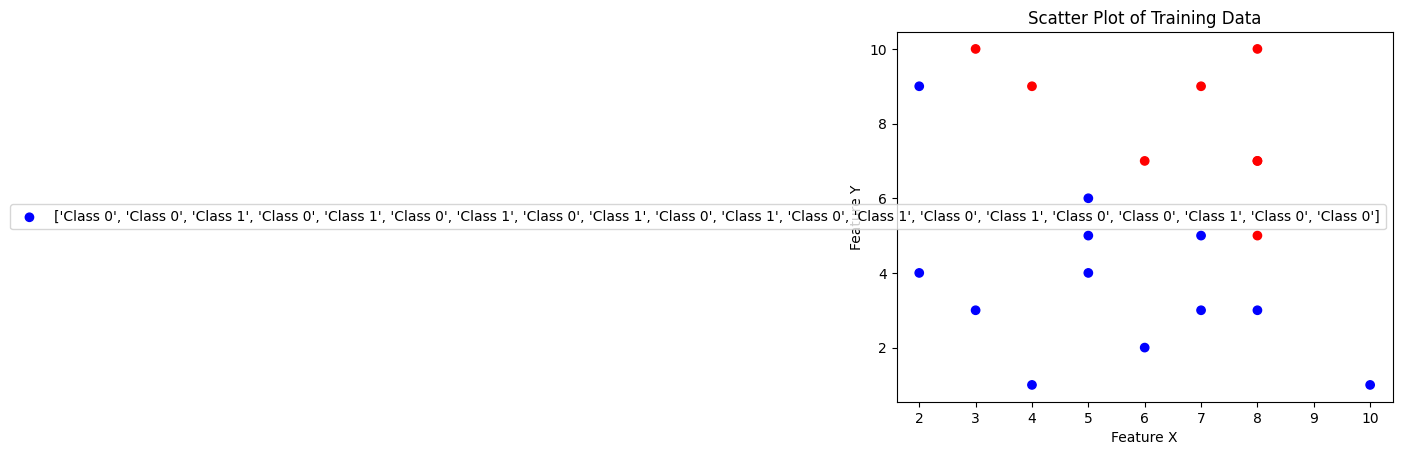

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate 20 data points with random values between 1 and 10 for features X and Y
X = np.random.randint(1, 11, size=20)
Y = np.random.randint(1, 11, size=20)

# Assign the points to two different classes based on a condition (e.g., X + Y > 12)
labels = np.where(X + Y > 12, 1, 0)

# Color mapping for classes
colors = {0: 'blue', 1: 'red'}

# Create scatter plot
plt.scatter(X, Y, c=[colors[label] for label in labels], label=['Class 0' if label == 0 else 'Class 1' for label in labels])

# Set labels and title
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data')

# Add legend
plt.legend()

# Show the plot
plt.show()


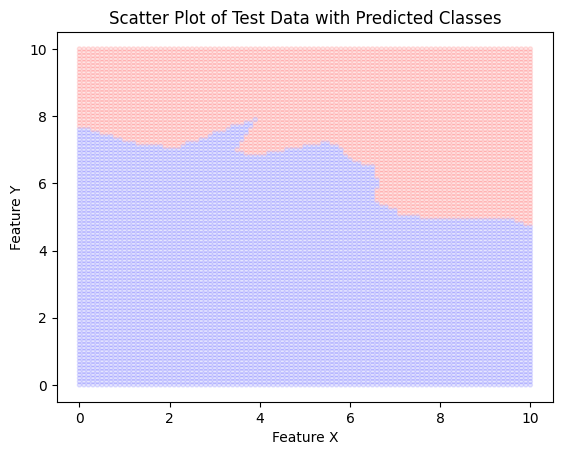

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate test set with values of X and Y varying between 0 and 10 with increments of 0.1
test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))

# Create kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the kNN classifier on the training data
knn_classifier.fit(np.column_stack((X, Y)), labels)

# Predict classes for the test set
predicted_labels = knn_classifier.predict(test_data)

# Color mapping for predicted classes
predicted_colors = {0: 'blue', 1: 'red'}

# Create scatter plot for the test data
plt.scatter(test_data[:, 0], test_data[:, 1], c=[predicted_colors[label] for label in predicted_labels], marker='.', alpha=0.1)

# Set labels and title
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Test Data with Predicted Classes')

# Show the plot
plt.show()


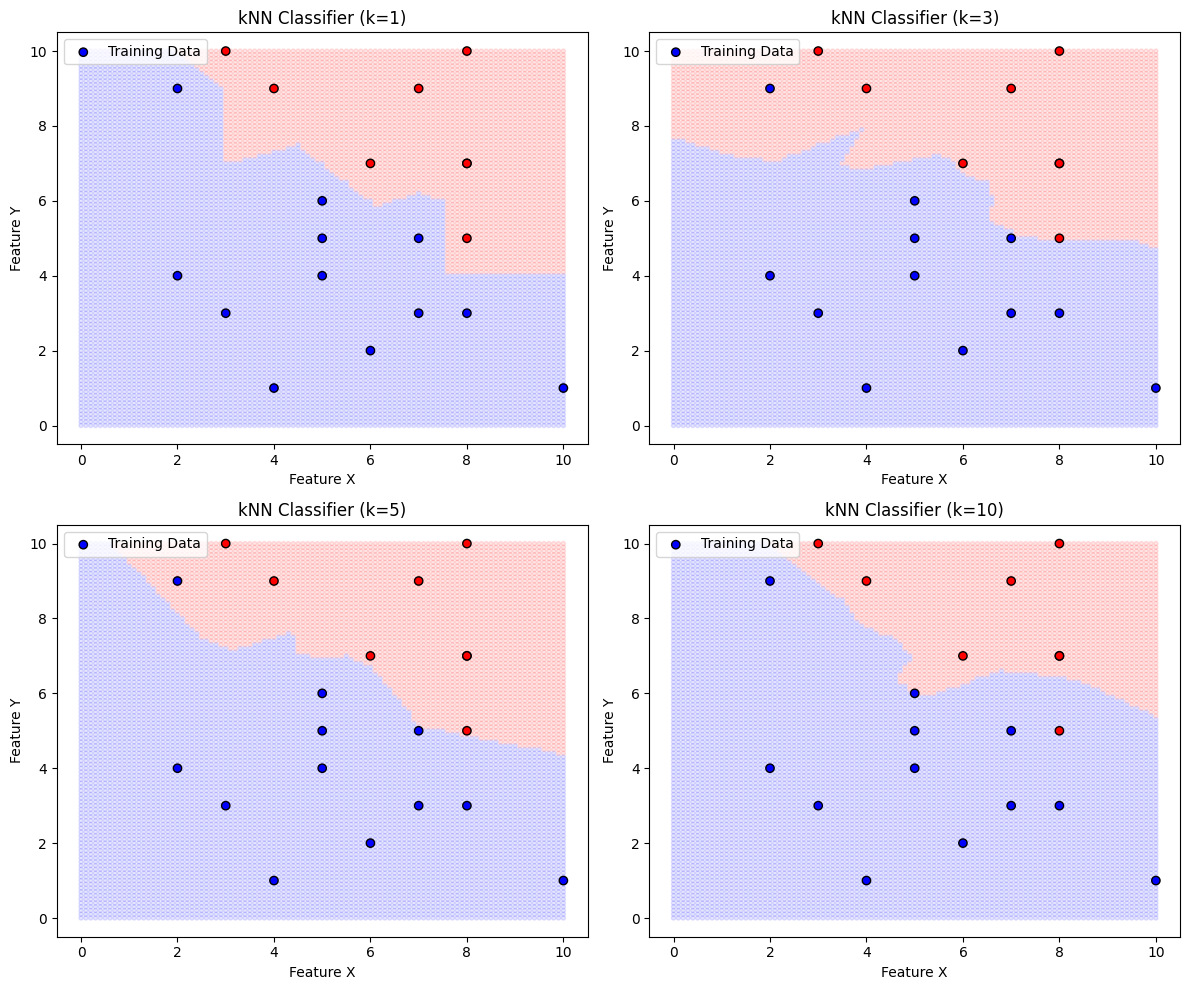

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set seed for reproducibility
np.random.seed(42)

# Generate 20 data points with random values between 1 and 10 for features X and Y
X_train = np.random.randint(1, 11, size=20)
Y_train = np.random.randint(1, 11, size=20)

# Assign the points to two different classes based on a condition (e.g., X + Y > 12)
labels_train = np.where(X_train + Y_train > 12, 1, 0)

# Generate test set with values of X and Y varying between 0 and 10 with increments of 0.1
test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))

# Set up subplots for different values of k
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
k_values = [1, 3, 5, 10]

for i, k in enumerate(k_values):
    # Create kNN classifier with current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the kNN classifier on the training data
    knn_classifier.fit(np.column_stack((X_train, Y_train)), labels_train)

    # Predict classes for the test set
    predicted_labels = knn_classifier.predict(test_data)

    # Color mapping for predicted classes
    predicted_colors = {0: 'blue', 1: 'red'}

    # Create scatter plot for the test data
    axes[i].scatter(test_data[:, 0], test_data[:, 1], c=[predicted_colors[label] for label in predicted_labels], marker='.', alpha=0.1)

    # Highlight training points on the plot
    axes[i].scatter(X_train, Y_train, c=[predicted_colors[label] for label in labels_train], marker='o', edgecolors='black', label='Training Data')

    # Set labels and title
    axes[i].set_title(f'kNN Classifier (k={k})')
    axes[i].set_xlabel('Feature X')
    axes[i].set_ylabel('Feature Y')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


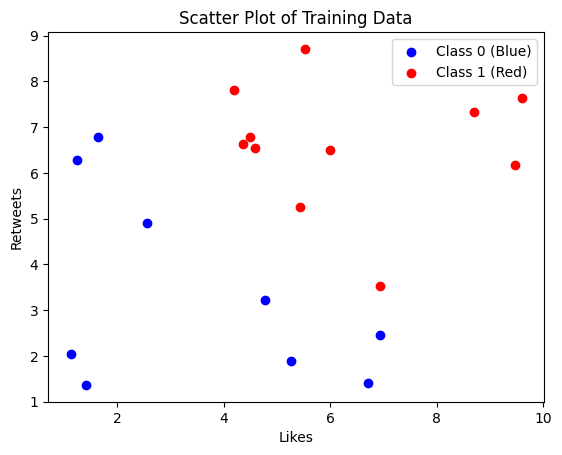

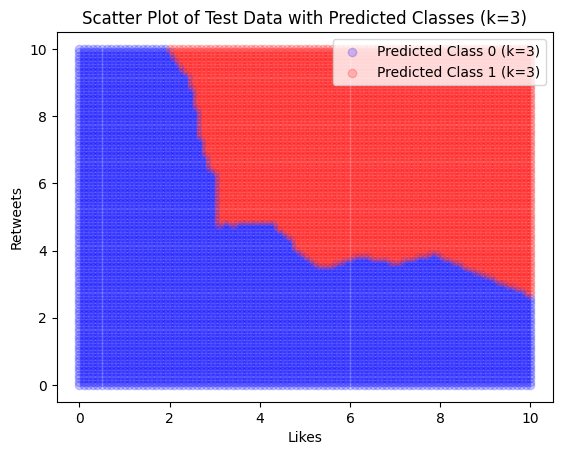

In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def load_project_data(file_path):
    # Load project data from CSV file
    return pd.read_csv(file_path)

def generate_training_data(features, num_points):
    # Generate random values for the chosen features
    feature_values = np.random.uniform(1, 10, (num_points, len(features)))

    # Combine feature values into a DataFrame
    training_data = pd.DataFrame(feature_values, columns=features)

    # Assign classes based on a simple condition
    training_data['Class'] = np.where(training_data[features[0]] + training_data[features[1]] > 10, 'Red', 'Blue')

    return training_data

def plot_training_data(training_data, features):
    # Plot the scatter plot with colors based on the assigned classes
    plt.scatter(training_data[training_data['Class'] == 'Blue'][features[0]], training_data[training_data['Class'] == 'Blue'][features[1]], c='blue', label='Class 0 (Blue)')
    plt.scatter(training_data[training_data['Class'] == 'Red'][features[0]], training_data[training_data['Class'] == 'Red'][features[1]], c='red', label='Class 1 (Red)')

    # Add labels and legend
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('Scatter Plot of Training Data')
    plt.legend()

    # Show the plot
    plt.show()

def generate_test_data(features):
    # Generate test data with values of features varying between 0 and 10 with increments of 0.1
    feature_values = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
    test_data = pd.DataFrame({features[0]: feature_values[0].flatten(), features[1]: feature_values[1].flatten()})

    return test_data

def classify_test_data(training_data, k, test_data, features):
    # Create kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on training data
    knn_classifier.fit(training_data[features], training_data['Class'])

    # Predict classes for test data
    predicted_classes = knn_classifier.predict(test_data[features])

    # Add predicted classes to test data
    test_data['Predicted_Class'] = predicted_classes

    return test_data

def plot_test_data(test_data, features, k):
    # Plot the scatter plot with colors based on the predicted classes
    plt.scatter(test_data[test_data['Predicted_Class'] == 'Blue'][features[0]], test_data[test_data['Predicted_Class'] == 'Blue'][features[1]], c='blue', alpha=0.2, label=f'Predicted Class 0 (k={k})')
    plt.scatter(test_data[test_data['Predicted_Class'] == 'Red'][features[0]], test_data[test_data['Predicted_Class'] == 'Red'][features[1]], c='red', alpha=0.2, label=f'Predicted Class 1 (k={k})')

    # Add labels and legend
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f'Scatter Plot of Test Data with Predicted Classes (k={k})')
    plt.legend()

    # Show the plot
    plt.show()

if __name__ == "__main__":
    # Load project data
    project_data_path = "C:\\Users\\THANUJ RAJA\\OneDrive\\Desktop\\sentimentdataset.csv"
    project_data = load_project_data(project_data_path)

    # Choose two features for A6 (you can replace these with any two features from the project data)
    chosen_features = ['Likes', 'Retweets']

    # Generate and plot training data
    num_training_points = 20
    training_data = generate_training_data(chosen_features, num_training_points)
    plot_training_data(training_data, chosen_features)

    # Generate test data
    test_data = generate_test_data(chosen_features)

    # Classify test data using kNN classifier (k = 3) and plot the scatter plot
    k_value = 3
    test_data_with_predictions = classify_test_data(training_data, k_value, test_data, chosen_features)
    plot_test_data(test_data_with_predictions, chosen_features, k_value)


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_project_data(file_path):
    # Load project data from CSV file
    return pd.read_csv(file_path)

def prepare_data(df, features, target):
    # Prepare data for model training
    X = df[features]
    y = df[target]
    return X, y

if __name__ == "__main__":
    # Load project data
    project_data_path = "C:\\Users\\YSPRE\\OneDrive\\Desktop\\sentimentdataset.csv"
    project_data = load_project_data(project_data_path)

    # Choose features and target variable
    features = ['Likes', 'Retweets']
    target = 'Sentiment'

    # Prepare data for model training
    X, y = prepare_data(project_data, features, target)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grid for kNN and the range of k values to search
    param_grid = {'n_neighbors': np.arange(1, 21)}

    # Create a kNN classifier
    knn_classifier = KNeighborsClassifier()

    # Create GridSearchCV
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

    # Fit the model with the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the corresponding accuracy
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

    # Evaluate the model on the test set
    test_accuracy = grid_search.score(X_test, y_test)
    print("Test Set Accuracy:", test_accuracy)


c:\Users\THANUJ RAJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_neighbors': 13}
Best Accuracy: 0.08717948717948718
Test Set Accuracy: 0.02040816326530612
